In [ ]:
# PDE for Put option
# p_t+0.5*sigma^2*s^2*P_{ss}+r*s*P_{s}-r*P = 0
# Boundary: 
# Now we approximate the solution to the above PDE

In [87]:
# Global Constant
S_list = list(range(0, 50, 10)) + \
           list(range(45, 85, 5)) + \
           list(range(82, 91, 2)) + \
           list(range(91, 110)) + \
           list(range(110, 122, 2)) + \
           list(range(125, 165, 5)) + \
           list(range(170, 210, 10)) + \
           list(range(220, 310, 20)) + \
           list(range(350, 1050, 50)) + \
           list(range(2000, 10001, 1000))

K = 100
T = 0.25
r= 0.1
sigma = 0.8
S_0 = 100
N = 25

print(len(S_list))

83


In [88]:
import numpy as np
import scipy.stats as si

def european_put(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European Put Option.

    Parameters:
    S (float): Current stock price
    K (float): Strike price of the option
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate (annual rate, continuous compounding)
    sigma (float): Volatility of the underlying stock (annual standard deviation of log returns)

    Returns:
    float: Black-Scholes price of the European Put Option
    """
    
    # Calculating d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Calculate the put price using the Black-Scholes formula
    put_price = K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)
    
    return put_price



put_price = european_put(S_0, K, T, r, sigma)
print(f"The Black-Scholes price of the European put option is: {put_price}")



The Black-Scholes price of the European put option is: 14.451905854467874


In [89]:
# Explicit Scheme

def ExplicitScheme(K,T,S_list,N):
    
    M = len(S_list)
    dtau = T/N
   #print(dtau)
    # grid for saving the solutions
    res = [[0 for i in range(N+1)] for j in range(M)]
    #print(len(res[0]))
    for i in range(M):
        res[i][0] = max(K - S_list[i], 0)
    #print(res)
    #loop through all the time step
    for n in range(1,N+1,1):
        # boundary condition

        res[0][n] = res[0][n-1]/(1+r*dtau) # lower boundary on s
        res[M-1][n] = 0

        # loop through all the prices s_i
        for i in range(1,M-1,1):


            # define the upperstram weights:
            alpha_i_foward = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list[i-1]))
            beta_i_foward = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))+r*S_list[i]/(S_list[i+1]-S_list[i])
            if (alpha_i_foward>= 0 and beta_i_foward>=0):
                alpha_i_upper = alpha_i_foward
                beta_i_upper = beta_i_foward
            else:
                # backward scheme
                alpha_i_upper = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list)[i-1])-r*S_list[i]/(S_list[i]-S_list[i-1])
                beta_i_upper = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))

            # use the explicit scheme to update the value with centrel finite difference
            alpha_i = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list[i-1]))-r*S_list[i]/(S_list[i+1]-S_list[i-1])
            beta_i = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))+r*S_list[i]/(S_list[i+1]-S_list[i-1])
            #print(alpha_i)
            # avioid scillation:
            
            if alpha_i < 0:

                alpha_i = alpha_i_upper
                beta_i = beta_i_upper
            
            
            if alpha_i<0 or beta_i<0:
                print('wrong')

            #print(res)
            res[i][n] = res[i][n-1]*(1-(alpha_i+beta_i+r)*dtau) + alpha_i*res[i-1][n-1]*dtau + beta_i*res[i+1][n-1]*dtau
    return res
for N in (25,50,100,200,400):
    print(ExplicitScheme(K,T,S_list,N)[27][-1])
# ExplicitScheme(K,T,S_list,400)[27][-1]

1.259050450304512e+51
-4.914886494666574e+88
-4.367037416296519e+149
-1.3384348744761135e+240
nan


In [99]:
def Fully_implicit(K,T,S_list,N):
    
    M = len(S_list)
    dtau = T/N
    

    #loop through all the time step
    for n in range(1,N+1,1):

        matrix_M = np.zeros((M,M))
        matrix_M[0][0] = r*dtau
        for i in range(1,M-1,1):

            
            # define the upperstram weights:
            alpha_i_foward = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list[i-1]))
            beta_i_foward = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))+r*S_list[i]/(S_list[i+1]-S_list[i])
            if (alpha_i_foward>= 0 and beta_i_foward>=0):
                alpha_i_upper = alpha_i_foward
                beta_i_upper = beta_i_foward
            else:
                # backward scheme
                alpha_i_upper = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list)[i-1])-r*S_list[i]/(S_list[i]-S_list[i-1])
                beta_i_upper = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))

            # use the explicit scheme to update the value with centrel finite difference
            alpha_i = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list[i-1]))-r*S_list[i]/(S_list[i+1]-S_list[i-1])
            beta_i = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))+r*S_list[i]/(S_list[i+1]-S_list[i-1])
            #print(alpha_i)
            # avioid scillation:
            
            if alpha_i < 0:

                alpha_i = alpha_i_upper
                beta_i = beta_i_upper
            
            
            if alpha_i<0 or beta_i<0:
                print('wrong')
            #alphas.append(alpha_i)
            matrix_M[i][i-1] = -alpha_i*dtau
            matrix_M[i][i] = dtau*(alpha_i+beta_i+r)
            matrix_M[i][i+1] = -beta_i*dtau
    I = np.identity(M)
    K_arrary = [K for i in range(M)]
    #print(K)
    res = np.zeros((M,N+1))
    res[:,0] = np.maximum(np.array(K_arrary) - np.array(S_list), 0)
    for n in range(N):
        res[:,n+1] = np.linalg.solve(I+matrix_M,res[:,n])
    #print(res[0])
    return res

Fully_implicit(K,T,S_list,400)[27][-1]

14.42569301278311

In [106]:
def Crank_Nicolson(K,T,S_list,N):
    
    M = len(S_list)
    dtau = T/N
    

    #loop through all the time step
    for n in range(1,N+1,1):

        matrix_M = np.zeros((M,M))
        matrix_M[0][0] = r*dtau/2
        for i in range(1,M-1,1):

            
            # define the upperstram weights:
            alpha_i_foward = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list[i-1]))
            beta_i_foward = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))+r*S_list[i]/(S_list[i+1]-S_list[i])
            if (alpha_i_foward>= 0 and beta_i_foward>=0):
                alpha_i_upper = alpha_i_foward
                beta_i_upper = beta_i_foward
            else:
                # backward scheme
                alpha_i_upper = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list)[i-1])-r*S_list[i]/(S_list[i]-S_list[i-1])
                beta_i_upper = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))

            # use the explicit scheme to update the value with centrel finite difference
            alpha_i = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list[i-1]))-r*S_list[i]/(S_list[i+1]-S_list[i-1])
            beta_i = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))+r*S_list[i]/(S_list[i+1]-S_list[i-1])
            #print(alpha_i)
            # avioid scillation:
            
            if alpha_i < 0:

                alpha_i = alpha_i_upper
                beta_i = beta_i_upper
            
            
            if alpha_i<0 or beta_i<0:
                print('wrong')
            #alphas.append(alpha_i)
            matrix_M[i][i-1] = -alpha_i*dtau/2
            matrix_M[i][i] = dtau*(alpha_i+beta_i+r)/2
            matrix_M[i][i+1] = -beta_i*dtau/2
    I = np.identity(M)
    K_arrary = [K for i in range(M)]
    #print(K)
    res = np.zeros((M,N+1))
    res[:,0] = np.maximum(np.array(K_arrary) - np.array(S_list), 0)
    # for n in range(N):
    #     res[:,n+1] = np.linalg.solve(I+matrix_M,res[:,n])

    for n in range(N):  # Iterate over each time step
        res[:,n+1] = np.linalg.solve(I + matrix_M, (I - matrix_M).dot(res[:,n]))


    #print(res[0])
    return res

Crank_Nicolson(K,T,S_list,400)[27][-1]

14.430880983910757

In [107]:
def Rannacher(K,T,S_list,N):
    
    M = len(S_list)
    dtau = T/N
    

    #loop through all the time step
    for n in range(1,N+1,1):

        matrix_M = np.zeros((M,M))
        matrix_M[0][0] = r*dtau

        matrix_M_CN = np.zeros((M,M))
        matrix_M_CN[0][0] = r*dtau/2
        for i in range(1,M-1,1):

            
            # define the upperstram weights:
            alpha_i_foward = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list[i-1]))
            beta_i_foward = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))+r*S_list[i]/(S_list[i+1]-S_list[i])
            if (alpha_i_foward>= 0 and beta_i_foward>=0):
                alpha_i_upper = alpha_i_foward
                beta_i_upper = beta_i_foward
            else:
                # backward scheme
                alpha_i_upper = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list)[i-1])-r*S_list[i]/(S_list[i]-S_list[i-1])
                beta_i_upper = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))

            # use the explicit scheme to update the value with centrel finite difference
            alpha_i = sigma**2*S_list[i]**2/((S_list[i]-S_list[i-1])*(S_list[i+1]-S_list[i-1]))-r*S_list[i]/(S_list[i+1]-S_list[i-1])
            beta_i = sigma**2*S_list[i]**2/((S_list[i+1]-S_list[i])*(S_list[i+1]-S_list[i-1]))+r*S_list[i]/(S_list[i+1]-S_list[i-1])
            #print(alpha_i)
            # avioid scillation:
            
            if alpha_i < 0:

                alpha_i = alpha_i_upper
                beta_i = beta_i_upper
            
            
            if alpha_i<0 or beta_i<0:
                print('wrong')
            #alphas.append(alpha_i)
            matrix_M[i][i-1] = -alpha_i*dtau
            matrix_M[i][i] = dtau*(alpha_i+beta_i+r)
            matrix_M[i][i+1] = -beta_i*dtau
            matrix_M_CN[i][i-1] = -alpha_i*dtau/2
            matrix_M_CN[i][i] = dtau*(alpha_i+beta_i+r)/2
            matrix_M_CN[i][i+1] = -beta_i*dtau/2
    I = np.identity(M)
    K_arrary = [K for i in range(M)]
    #print(K)
    res = np.zeros((M,N+1))
    res[:,0] = np.maximum(np.array(K_arrary) - np.array(S_list), 0)
    # for n in range(N):
    #     res[:,n+1] = np.linalg.solve(I+matrix_M,res[:,n])

    # first tow step explicit
    for n in range(0,2,1):
        res[:,n+1] = np.linalg.solve(I+matrix_M,res[:,n])
    # next use Crank Nicolson
    for n in range(2,N,1):
        res[:,n+1] = np.linalg.solve(I+matrix_M_CN, (I - matrix_M_CN).dot(res[:,n]))


    # for n in range(2:N):  # Iterate over each time step
    #     res[:,n+1] = np.linalg.solve(I + matrix_M, (I - matrix_M).dot(res[:,n]))


    #print(res[0])
    return res

Rannacher(K,T,S_list,400)[27][-1]


14.430855102238102

In [110]:
# A table with four columns (one for each method) showing the absolute error for today’s price of the
#option for different time steps ∆τ in the rows. Use N ∈ {25, 50, 100, 200, 400} (so your table should have
#5 rows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N_list = [25,50,100,200,400]
methods = [ExplicitScheme,Fully_implicit,Crank_Nicolson,Rannacher]
error = np.zeros((5,4))
for i in range(5):
    for j in range(4):
        error[i][j] = abs(methods[j](K,T,S_list,N_list[i])[27][-1]-put_price)
df = pd.DataFrame(error,columns = ['ExplicitScheme','Fully_implicit','Crank_Nicolson','Rannacher'],index = N_list)
df


,ExplicitScheme,Fully_implicit,Crank_Nicolson,Rannacher
25,1.259050e+51,0.103761,0.052793,0.026670
50,4.914886e+88,0.062455,0.024325,0.022464
100,4.367037e+149,0.041756,0.020978,0.021389
200,1.338435e+240,0.031396,0.021015,0.021119
400,NaN,0.026213,0.021025,0.021051


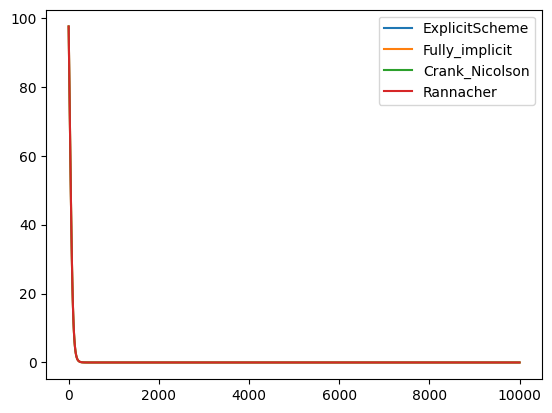

In [116]:
#  plot of today’s option price as a function of S0: You should have 4 curves (one for each method). Use
# N = 400.
S_list = list(range(0, 50, 10)) + \
           list(range(45, 85, 5)) + \
           list(range(82, 91, 2)) + \
           list(range(91, 110)) + \
           list(range(110, 122, 2)) + \
           list(range(125, 165, 5)) + \
           list(range(170, 210, 10)) + \
           list(range(220, 310, 20)) + \
           list(range(350, 1050, 50)) + \
           list(range(2000, 10001, 1000))
N = 400
S_0 = 100
K = 100
T = 0.25
r= 0.1
sigma = 0.8
methods = [ExplicitScheme,Fully_implicit,Crank_Nicolson,Rannacher]
for method in methods:
    prices = []
    for i in range(len(S_list)):
        prices.append(method(K,T,S_list,N)[i][-1])
    plt.plot(S_list,prices,label = method.__name__)
plt.legend()




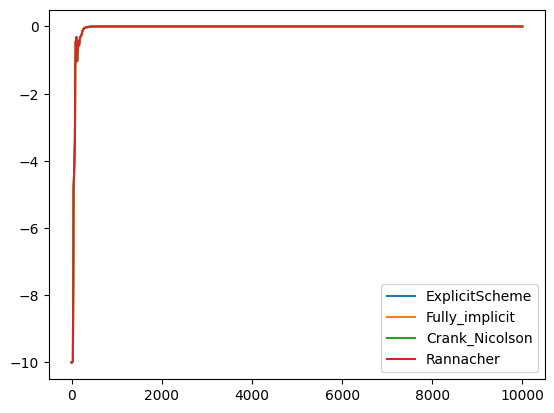

In [117]:
#A plot of today’s δ = ∂P/∂S as a function of S. You should have 4 curves (one for each method). Use
#N = 400.
S_list = list(range(0, 50, 10)) + \
           list(range(45, 85, 5)) + \
           list(range(82, 91, 2)) + \
           list(range(91, 110)) + \
           list(range(110, 122, 2)) + \
           list(range(125, 165, 5)) + \
           list(range(170, 210, 10)) + \
           list(range(220, 310, 20)) + \
           list(range(350, 1050, 50)) + \
           list(range(2000, 10001, 1000))
N = 400
S_0 = 100
K = 100
T = 0.25
r= 0.1
sigma = 0.8
methods = [ExplicitScheme,Fully_implicit,Crank_Nicolson,Rannacher]
for method in methods:
    prices = []
    for i in range(len(S_list)):
        prices.append(method(K,T,S_list,N)[i][-1])
    delta = np.gradient(prices)
    plt.plot(S_list,delta,label = method.__name__)
plt.legend()
plt.show()


In [119]:
np.gradient(prices)

array([-9.99999327e+00, -9.99971049e+00, -9.99405461e+00, -9.94895353e+00,
       -7.37558054e+00, -4.78224997e+00, -4.63932149e+00, -4.45090853e+00,
       -4.22215565e+00, -3.96124421e+00, -3.67791170e+00, -3.38210400e+00,
       -2.22055759e+00, -1.18512749e+00, -1.13803344e+00, -1.09157230e+00,
       -1.04587776e+00, -7.59099808e-01, -4.89482237e-01, -4.78588850e-01,
       -4.67829462e-01, -4.57208723e-01, -4.46730846e-01, -4.36399624e-01,
       -4.26218445e-01, -4.16190308e-01, -4.06317842e-01, -3.96603315e-01,
       -3.87048659e-01, -3.77655479e-01, -3.68425073e-01, -3.59358445e-01,
       -3.50456325e-01, -3.41719177e-01, -3.33147221e-01, -3.24740443e-01,
       -3.16498611e-01, -4.56652514e-01, -5.85548143e-01, -5.55516234e-01,
       -5.26761787e-01, -4.99261439e-01, -7.94259781e-01, -1.03154088e+00,
       -8.97582017e-01, -7.79594478e-01, -6.76095949e-01, -5.85621264e-01,
       -5.06764275e-01, -4.38204651e-01, -5.27060212e-01, -5.65246809e-01,
       -4.21326635e-01, -